In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import scipy

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [2]:
# images 
ct_image_path_covid = 'COVID-19 Dataset/CT/COVID'
ct_image_path_nocovid = 'COVID-19 Dataset/CT/Non-COVID'

xray_image_path_covid = 'COVID-19 Dataset/X-ray/COVID'
xray_image_path_nocovid = 'COVID-19 Dataset/X-ray/Non-COVID'

In [3]:
# folder paths - X_rays 
train_dir = 'COVID-19 Dataset/X-ray'

# rescaling and augmentation
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, fill_mode='nearest')

# creating generators
XR_train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), 
                                                    batch_size=32, class_mode='categorical')

Found 9537 images belonging to 2 classes.


In [4]:
# folder paths - CT scans
train_dir = 'COVID-19 Dataset/CT'

# rescaling and augmentation
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=True, fill_mode='nearest')

# creating generators
ct_train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), 
                                                    batch_size=32, class_mode='categorical')

Found 8054 images belonging to 2 classes.


In [5]:
# target breakdowns

ct_labels = ct_train_generator.classes
XR_labels = XR_train_generator.classes

ct_label, ct_count = np.unique(ct_labels, return_counts=True)
XR_label, XR_count = np.unique(XR_labels, return_counts=True)

print('CT ~ {}'.format(list(zip(ct_label, ct_count))))
print('XR ~ {}'.format(list(zip(XR_label, XR_count))))


CT ~ [(0, 5427), (1, 2627)]
XR ~ [(0, 4044), (1, 5493)]


In [6]:

def display_image(scan,index):
    #params: takes in index number (int), scan type (string) {'CT', 'X-Ray'}
    # returns: shows images from each type of scan and the class it belongs too 
    
    image_list = []
    image1 = 'COVID-19 Dataset/{}/COVID/{}'.format(scan,
                                                   os.listdir('COVID-19 Dataset/{}/COVID'.format(scan))[index])
    image2 = 'COVID-19 Dataset/{}/Non-COVID/{}'.format(scan,
                                                       os.listdir('COVID-19 Dataset/{}/Non-COVID'.format(scan))[index])

    image_list.extend([image1,image2])
    for x in image_list:  
        plt.figure()
        plt.imshow(tf.keras.utils.load_img(x, target_size=(350, 750)))

        
    


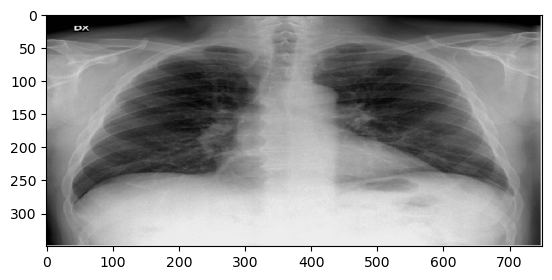

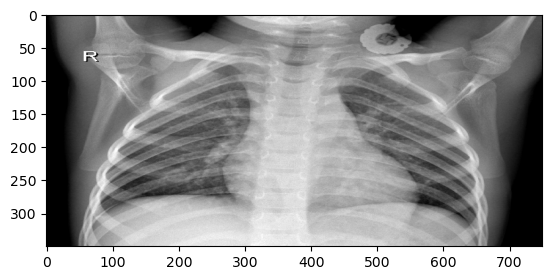

In [7]:
display_image('X-Ray',4)

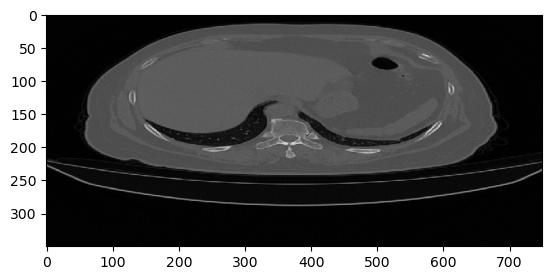

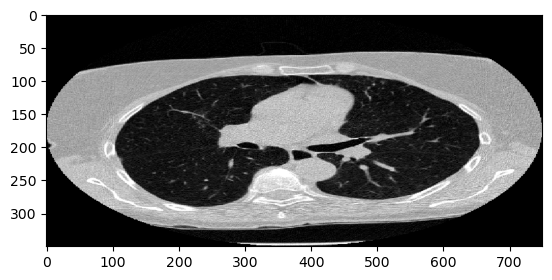

In [8]:
display_image('CT',3)

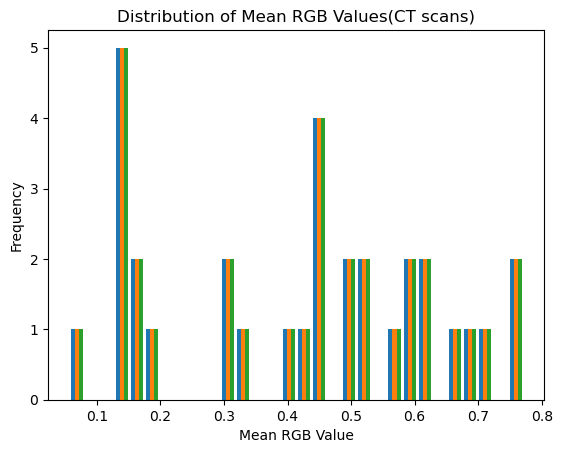

In [9]:
# evaluating RGB values per image 

images, labels = ct_train_generator.next()
images = np.reshape(images, (images.shape[0], images.shape[1], images.shape[2], 3))
mean_rgb = np.mean(images, axis=(1, 2))

plt.hist(mean_rgb, bins=30)
plt.title('Distribution of Mean RGB Values(CT scans)')
plt.xlabel('Mean RGB Value')
plt.ylabel('Frequency')
plt.show()

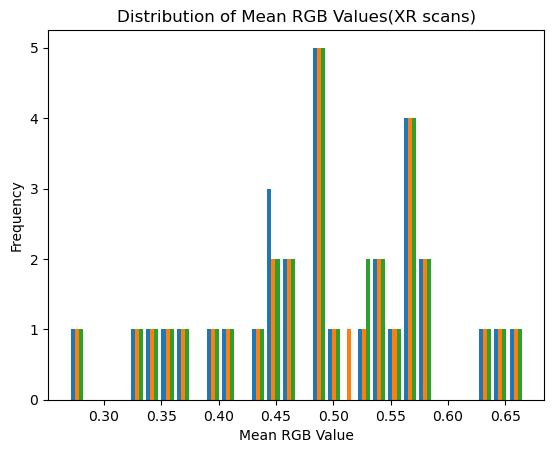

In [10]:
images, labels = XR_train_generator.next()
images = np.reshape(images, (images.shape[0], images.shape[1], images.shape[2], 3))
mean_rgb = np.mean(images, axis=(1, 2))

plt.hist(mean_rgb, bins=30)
plt.title('Distribution of Mean RGB Values(XR scans)')
plt.xlabel('Mean RGB Value')
plt.ylabel('Frequency')
plt.show()

In [11]:
image_shape = ct_train_generator.image_shape

print("Image shape:", image_shape)

Image shape: (224, 224, 3)
